In [78]:
from gensim.models import Word2Vec
import os
from gensim.models import Word2Vec
import glob, csv
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import itertools
from itertools import combinations
from itertools import product
import numpy as np

romance_model = Word2Vec.load("romance_model")
comics_model = Word2Vec.load("comics_model")
children_model = Word2Vec.load("children_model")
poetry_model = Word2Vec.load("poetry_model")
mystery_model = Word2Vec.load("mystery_model")

def cosine_similarity(pair, vectors):

    '''
    Word2Vec.wv.similarity(word1,word2)
    '''
    word1, word2 = pair
    if word1 and word2 in vectors:
        sim = vectors.similarity(word1,word2)
        return sim
    else: 
        return 0

def generate_heatmap_matrix(lexicon, gender_words, model):
    vectors = model.wv
    
    # Generate all possible pairs of words from lexicon and gender_words
    pairs = list(itertools.product(lexicon, gender_words))
    
    # Calculate similarity scores for each pair of words
    sim_scores = [cosine_similarity(pair, vectors) for pair in pairs]
    
    # Create a square DataFrame with similarity scores
    df_hm = pd.DataFrame(0, index=lexicon, columns=gender_words)
    for pair, score in zip(pairs, sim_scores):
        df_hm.loc[pair[0], pair[1]] = score
    
    return df_hm

def plot_heatmap(lexicon, gender_words, model, title):
    df_hm = generate_heatmap_matrix(lexicon, gender_words, model)

    plt.figure(figsize=(10, 8))
    sns.heatmap(df_hm,
                cmap="BuPu",
                xticklabels=True,
                yticklabels=True,
                annot=True,  
                fmt=".2f",  
                linewidths=.5)  
    plt.xlabel('Gender Words')
    plt.ylabel('Lexicon Words')
    plt.title(title)
    plt.show()

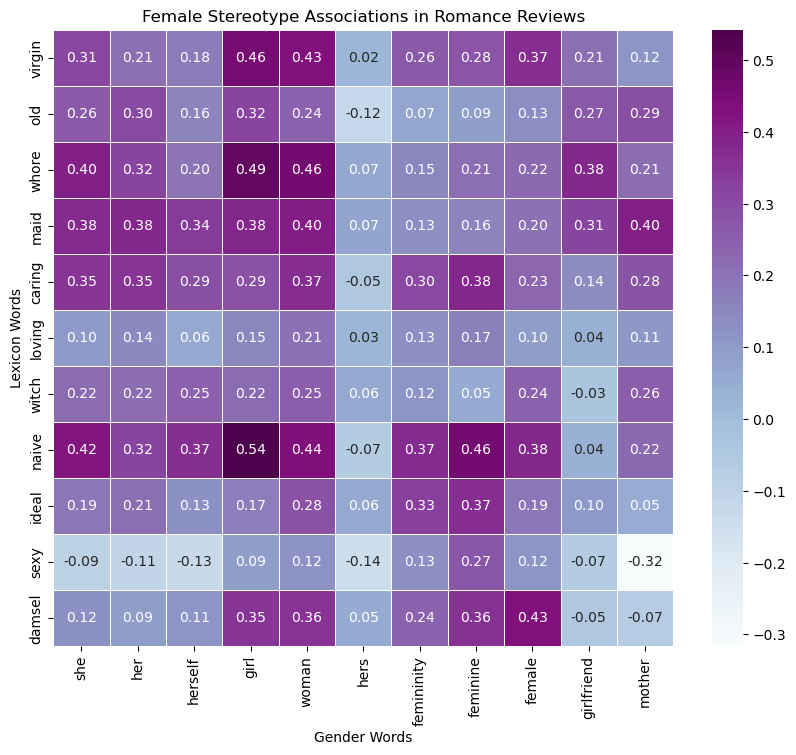

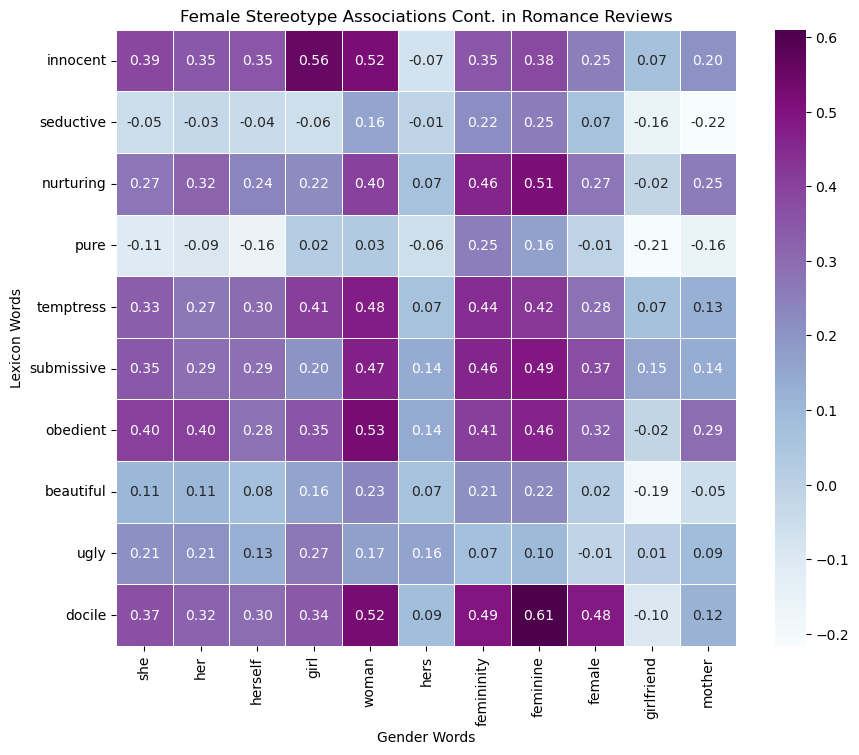

In [74]:
female_stereotypes_1 = ["virgin", "old", "whore", "maid", "caring", "loving", 
                     "witch", "naive", "ideal", "sexy", "damsel"]

female_stereotypes_2 = ["innocent", "seductive", "nurturing", "pure", "temptress", "submissive", 
                        "obedient", "beautiful","ugly","docile"]

women_words = ["she", "her", "herself", "girl", "woman", "hers", "femininity", "feminine",
                "female", "girlfriend", "mother"]

men_words = ["he", "him", "his", "himself", "boy", "man", "masculinity", "masculine",
            "male", "boyfriend", "father"]

male_stereotypes_1 = ["strong", "warrior", "soldier", "dominant", "sexy", "heroic", "ceo",
                     "alpha", "intelligent", "smart", "rich"]


plot_heatmap(female_stereotypes_1, women_words, romance_model, "Female Stereotype Associations in Romance Reviews")
plot_heatmap(female_stereotypes_2, women_words, romance_model, "Female Stereotype Associations Cont. in Romance Reviews")


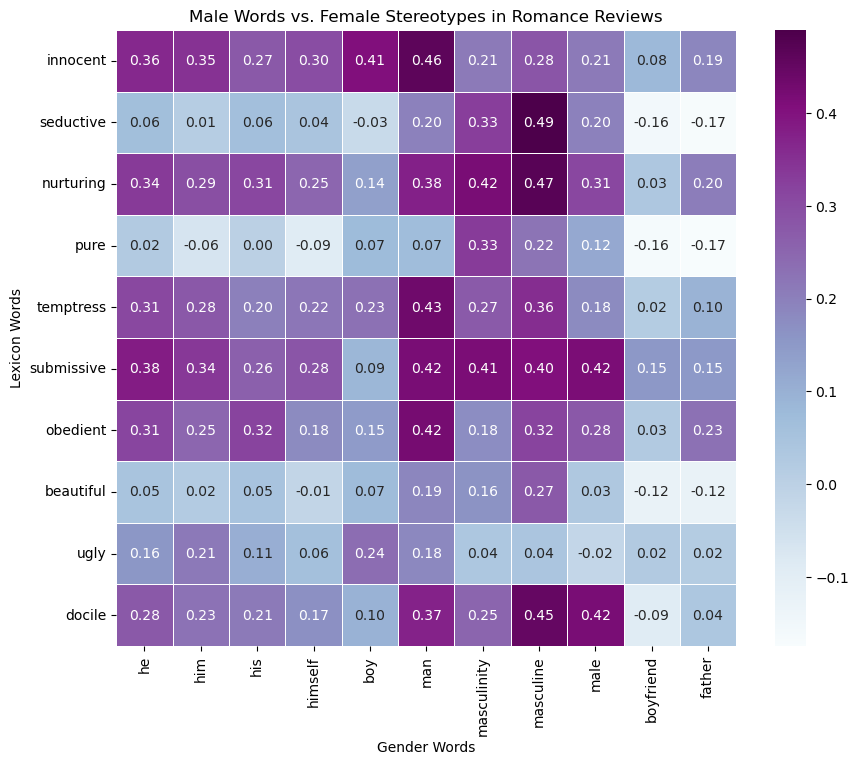

In [75]:
plot_heatmap(female_stereotypes_2, men_words, romance_model, "Male Words vs. Female Stereotypes in Romance Reviews")

In [71]:
print("Cosine similarities for 'she'")
print(romance_model.wv.most_similar("she", topn=10), "\n")

Cosine similarities for 'she'
[('her', 0.8868505358695984), ("she's", 0.7838302254676819), ('him', 0.76366126537323), ('he', 0.7436655759811401), ('herself', 0.7398728132247925), ("she'd", 0.6796103715896606), ('her;', 0.6669386029243469), ('his', 0.6514644026756287), ('woman', 0.6309819221496582), ('man', 0.604856014251709)] 



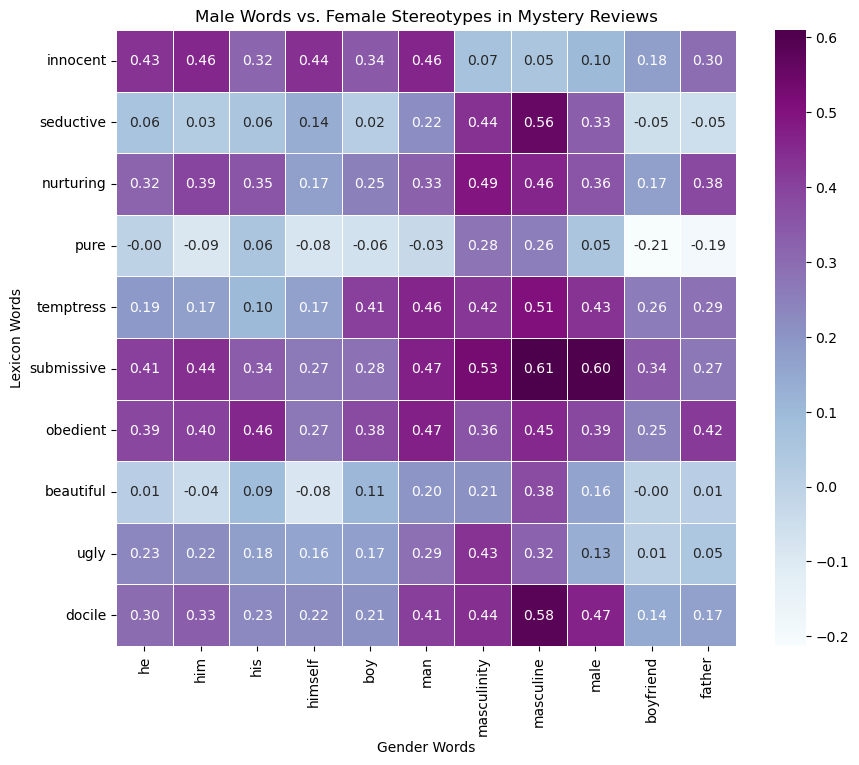

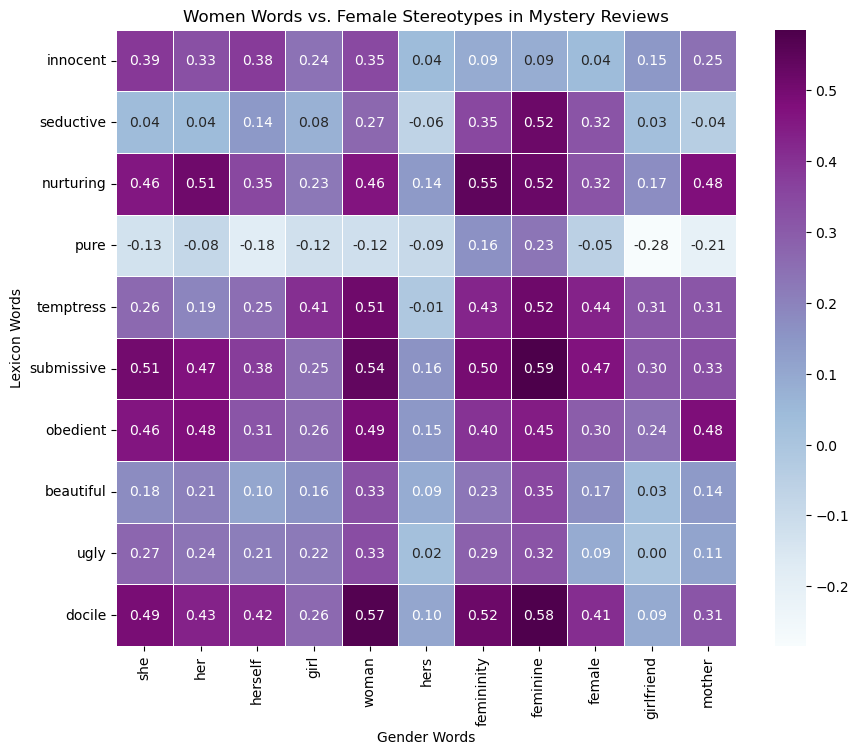

In [81]:
plot_heatmap(female_stereotypes_2, men_words, mystery_model, "Male Words vs. Female Stereotypes in Mystery Reviews")
plot_heatmap(female_stereotypes_2, women_words, mystery_model, "Women Words vs. Female Stereotypes in Mystery Reviews")
